# Engenharia do Conhecimento 2023/2024

## Lab class TP07

# Support Vector Machines

*A Machine Learning Tutorial by Andre Falcao, Nuno Garcia, Sofia Teixeira, Sara C. Madeira, Sara Silva, 2020--2024*

*Other references: book "Introduction to Machine Learning with Python: A Guide for Data Scientists", Sarah Guido&Andreas Müller, 2016, and "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow", A. Géron*


### Summary

SVM with scikit learn: Classification and Regression

Classification Exercise - MNIST dataset

Regression Exercise - Diabetes dataset





# Support Vector Classifiers in SKlearn

We are going to use first the Linear Support Vector Classifier (`LinearSVC`) for making a simple classifier, using the common Scikit-Learn framework. 

We are going to use the `plot.py` module as a library for simplifying several plotting functions using matplotlib

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pandas as pd

import plot
import matplotlib.pyplot as plt


Now we create a simple dataset with 2 features and 250 samples, very well separated

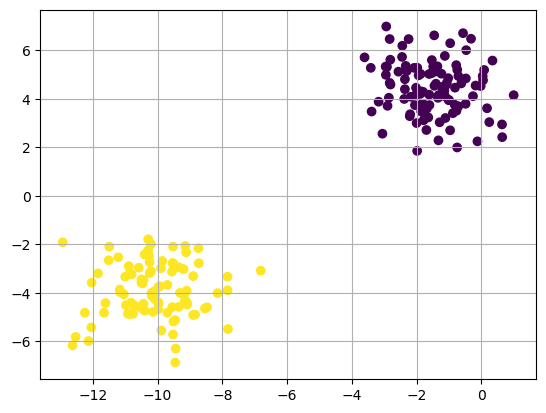

In [2]:

X, y = datasets.make_blobs(
    n_samples=250, n_features=2, centers=2, cluster_std=1.05, random_state=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.grid()
plt.show()

Now we will fit the Linear SVC and plot the best separating plane between the 2 classes

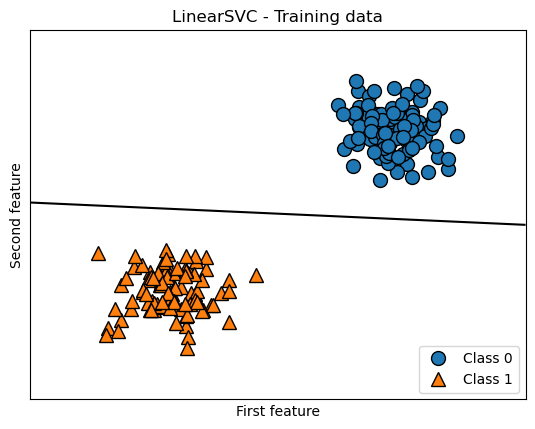

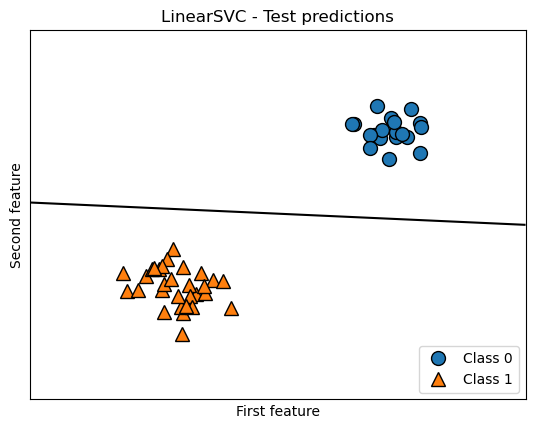

In [3]:
lsvm = LinearSVC(max_iter=5000,dual='auto').fit(X_train, y_train)

#Plot training dataset and separation by LinearSVC
plot.plot_2d_separator(lsvm, X, fill=False)
plot.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("LinearSVC - Training data")
plt.show()

#Plot test dataset and predictions made by the model
y_pred=lsvm.predict(X_test)
plot.plot_2d_separator(lsvm, X, fill=False)
plot.discrete_scatter(X_test[:, 0], X_test[:, 1], y_pred)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("LinearSVC - Test predictions")
plt.show()

## Soft Margins for Support Vector Classifiers

In `LinearSVC`, the trade-off parameter that determines the strength of the regularization is called $C$.

With higher values of $C$ there is less regularization and `LinearSVC` tries to separate all negative samples from positive samples, possibly creating a very thin decision boundary and therefore increasing the risk of overfitting.

With lower values of $C$ there is more regularization and `LinearSVC` cares more about finding a wide decision boundary between positive and negative samples, possibly ignoring a number of misclassifications and therefore increasing the risk of underfitting.


You can find below an illustration, using `LinearSVC` with different settings of $C$ and a slightly modified version of the `Forge dataset`.

### Introducing the Forge dataset

The `Forge dataset` is a simple two-class classification synthetic dataset, which has 26 points described by two features. The following code generates the dataset and creates a scatter plot visualizing all the data points in the dataset. The color and shape of the point identifies the class.

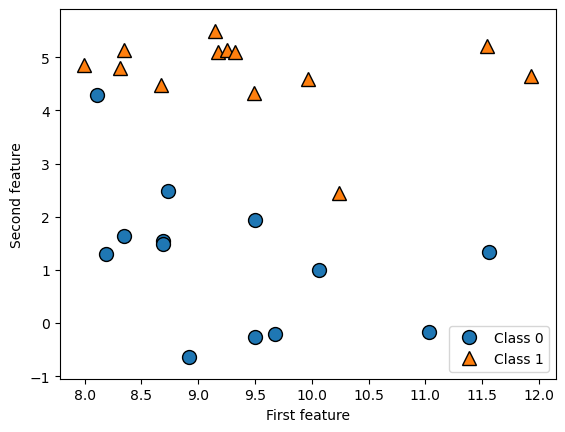

(26, 2)


In [4]:
import numpy as np
from sklearn.datasets import make_blobs

def make_forge():
    # a carefully hand-designed dataset
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y

def plot_forge(X, y):
    plot.discrete_scatter(X[:, 0], X[:, 1], y)
    plt.legend(["Class 0", "Class 1"], loc=4)
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()
    
X, y = make_forge()
plot_forge(X,y)
print(X.shape)

### Different C values

We can examine the impact of C in the general shape of the classifier by testing different possibilities `[2, 10, 1000]`

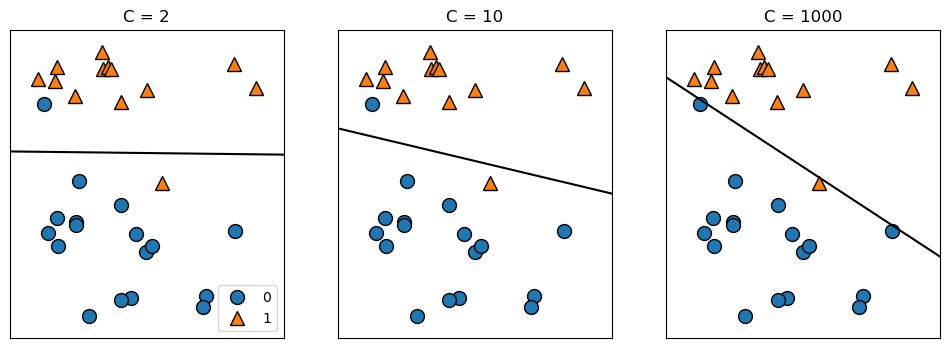

In [5]:

#Example using different values of C

def plot_linear_svc_regularization():
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    y[7] = 0
    y[27] = 0
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    for ax, C in zip(axes, [2, 10, 1e3]):
        plot.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

        svm = LinearSVC(C=C, tol=0.00001, dual=False).fit(X, y)
        w = svm.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(6, 13)
        yy = a * xx - (svm.intercept_[0]) / w[1]
        ax.plot(xx, yy, c='k')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title("C = %.0f" % C)
    axes[0].legend(loc="best")

plot_linear_svc_regularization()

### Linear Models for Multiclass Classification

Many linear classification models are binary models and don’t extend naturally to the multiclass case. 

A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the **one-vs-rest approach**. 

In the one-vs-rest approach, a binary model is learned for each class, which tries to separate this class from all of the other classes, resulting in as many binary models as there are classes.
To make a prediction, all binary classifiers are run on a test point. The classifier that outputs the highest value on its single class “wins” and this class label is returned as the prediction on the multiclass problem.

Having one binary classifier per class results in having one vector of coefficients $w$ and one intercept $b$ for each class. 

The class for which the result of the following formula is highest is the assigned class label:
\begin{align*}
& w_0.x_0 + w_1.x_1 + \dotsc + w_p . x_p + b. 
\end{align*}


In Scikit-learn, `LinearSVC` implements “one-vs-rest” multiclass strategy, thus training `n_class` models, where `n_class` is the number of classes.

Let’s apply `LinearSVC` to the simple three-class classification dataset `Blobs_V1`.


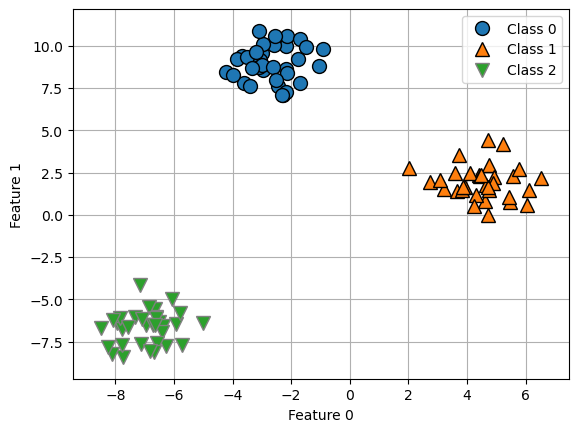

In [6]:
X, y = plot.make_Blobs_V1()
plot.plot_Blobs_V1(X,y)
plt.grid()
plt.show()


Now let's fit a Linear SVC to this dataset

In [7]:
linear_svm = LinearSVC(dual='auto').fit(X, y)
print("Coefficients:")
print(linear_svm.coef_)
print("Intercepts:")
print(linear_svm.intercept_)


Coefficients:
[[-0.17492412  0.23140766]
 [ 0.47622012 -0.06936786]
 [-0.18914207 -0.20400079]]
Intercepts:
[-1.07745775  0.13139239 -0.08604962]


As we can see the shape of `coef_` is (3, 2), meaning that each row of `coef_` contains the coefficient vector for one of the three classes. Each row has two entries, corresponding to the two features in the dataset. Moreover, `intercept_` is now a one-dimensional array, storing the intercepts for each class.

Let's visualize the lines learned by the three binary classifiers:

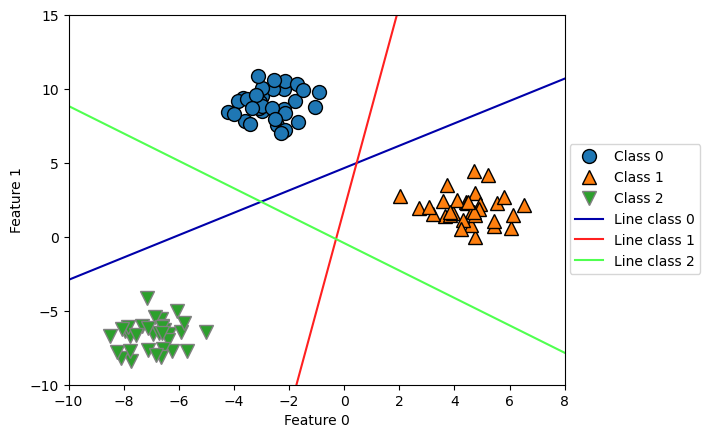

In [8]:

plot.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, plot.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 
            'Line class 2'], loc=(1.01, 0.3))
plt.show()

The red line shows the decision boundary for the binary classifier for the red class, and so on. You can see that all the red points in the training data are below the red line, which means they are on the “red” side of this binary classifier. The red points are above the green line, which means they are classified as “rest” by the binary classifier for the green class. The red points are below the blue line, which means the binary classifier for the blue class also classifies them as “rest”. Therefore, any point in this area will be classified as red by the final classifier (in $w_0.x_0 + w_1.x_1 + \dotsc + w_p . x_p + b$ the value corresponding to the red classifier is greater than zero, while it is smaller than zero for the other two classes).

**But what happens in the triangle in the middle of the plot? What if we have points there ?** 

All three binary classifiers classify points there as “rest”. In this context, to what class would a point there be assigned to? 

The answer is to the one with the highest value of $w[0] x[0] + w[1] x[1] + \dotsc + w[p] * x[p] + b$, that is the class of the closest line. 


The same happens for all other regions. The following figure shows the prediction for all regions of the 2D space.

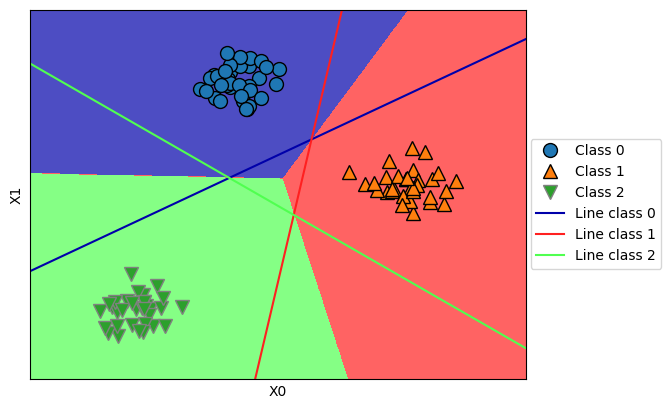

In [9]:
plot.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
plot.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, plot.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

## Kernelized Support Vector Machines (SVMs)

In the section above we saw the use of Linear SVMs for classification. 

**Kernelized support vector machines (often just referred to as SVMs) are an extension of Linear SVMs that allows for more complex models, which are not defined simply by hyperplanes in the input space.** 

While there are SVMs for classification and regression, we will focus the classification case, as implemented in `SVC`. Similar concepts apply to support vector regression, as implemented in `SVR` (see [SVMs in Scikit-learn](http://scikit-learn.org/stable/modules/svm.html#svm) for details).

### Linear Models and Non-Linear Features

As we saw earlier, **linear models can be quite limiting in low-dimensional spaces**, as lines or hyperplanes have limited flexibility. 

**One way to make a linear model more flexible is by adding more features, for example by adding interactions or polynomials of the input features.**

Let's now look at `Blobs_V2`, where we have two classes that are no longer linearly separable.

(100, 2)


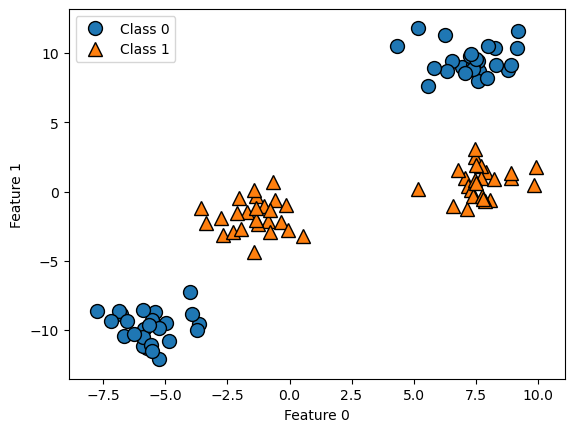

In [10]:
X, y = plot.make_Blobs_V2()
plot.plot_Blobs_V2(X,y)
print(X.shape)

A linear model for classification, such as `LinearSVC`, can only separate points using a line, and we can already imagine that will not be able to do a very good job on this dataset.

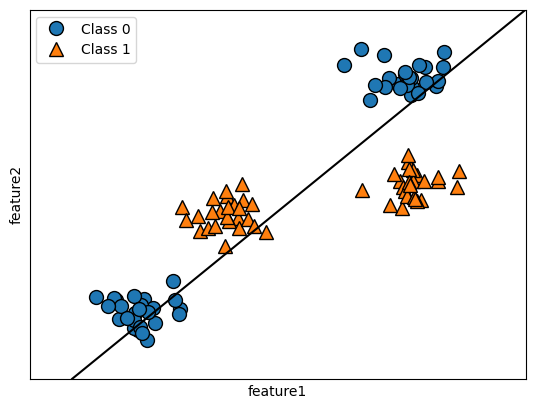

In [11]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(max_iter=10000,dual='auto').fit(X, y)

plot.plot_Blobs_V2(X,y)
plot.plot_2d_separator(linear_svm, X)
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

Let’s now expand the set of input features, say by also adding $feature2^2$, the square of the second feature, as a new feature. 

Instead of representing each data point as a two-dimensional point $(feature1, feature2)$, we now represent it as a three-dimensional point $(feature1, feature2, feature2^2)$ (this particular feature was chosen for illustration purposes and the choice is not particular important). 

This new representation is illustrated below in a three-dimensional scatter plot.

In [12]:
# Data Augmentation:

# squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

#show first 10 rows <- now a 3 Dimensional dataset
X_new[:10,:]

array([[-1.72161036e+00, -1.48033142e+00,  2.19138111e+00],
       [-3.65733840e+00, -9.54823830e+00,  9.11688546e+01],
       [ 7.07781630e+00,  9.95087718e-01,  9.90199567e-01],
       [-1.36579859e+00, -3.14862498e-01,  9.91383928e-02],
       [-2.66521206e+00, -3.12591651e+00,  9.77135405e+00],
       [ 7.63027116e+00,  8.69797933e+00,  7.56548444e+01],
       [-5.27144331e+00, -1.21188070e+01,  1.46865483e+02],
       [ 7.91767139e+00,  1.41547387e+00,  2.00356628e+00],
       [-1.41284184e+00,  1.12963480e-01,  1.27607478e-02],
       [-1.01519039e+00, -1.03318203e+00,  1.06746511e+00]])

Now show the 3D Data, where we can see it is trivially separable

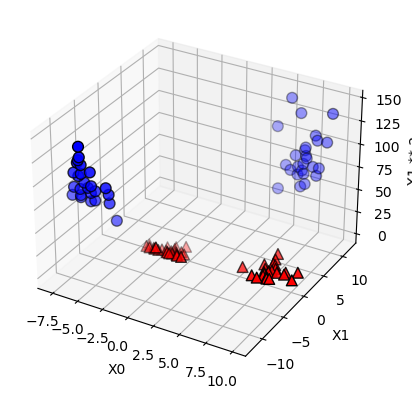

In [13]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')
ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("X1 ** 2")
plt.show()

As we can see, **in these new, three-dimensional representation of the data, it is now indeed possible to separate the red and the blue points using a linear model, a plane in three dimensions.** 

We can confirm this by fitting a linear model to these augmented data.

In [14]:
linear_svm_3d = LinearSVC(max_iter=10000,dual='auto').fit(X_new, y)

and observing its decision boundary (**again don't worry about the code**, the important is to understand what's happening with the data and the model).

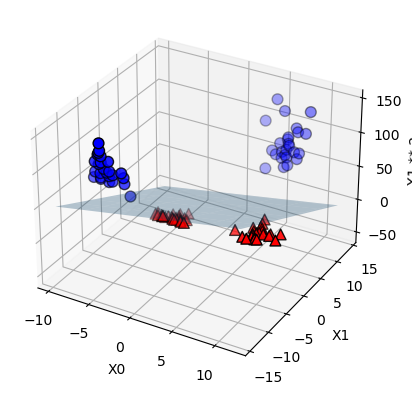

In [15]:
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
mask = y == 0


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',  s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')


ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("X1 ** 2")
plt.show()


**Although the linear SVM model is linear in the transformed feature space, when represented in the original feature space it has the form of a parabola**, as we can see in the plot below.

Text(0, 0.5, 'Feature 1')

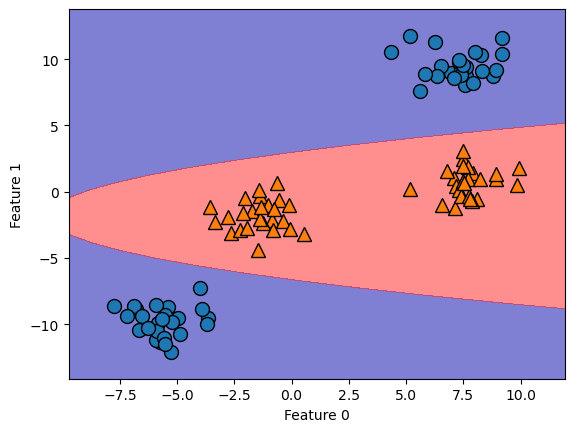

In [16]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=plot.cm2, alpha=0.5)
plot.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Exercise 1
1.1 Comment the results above

1.2 Go back and apply two different Data Augmentations: one that uses the other feature; one that uses both features.


In [17]:
#1.1 We can see by putting it in 3d we got a very good definition where the separation is

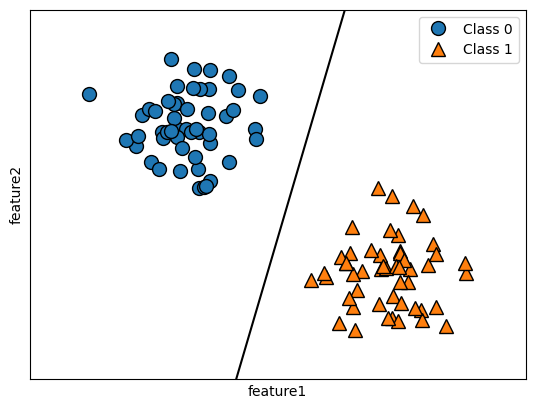

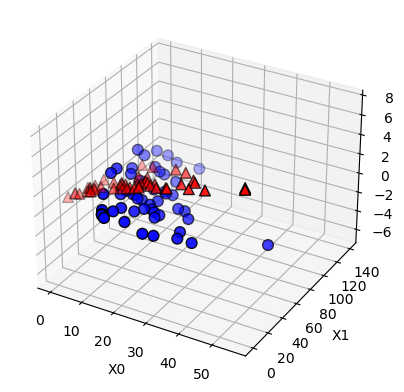

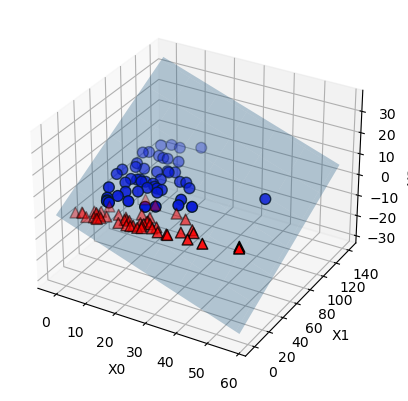

ValueError: X has 3 features, but LinearSVC is expecting 4 features as input.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
import plot

# Generate sample data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# Fit Linear SVM
linear_svm = LinearSVC(max_iter=10000, dual='auto').fit(X, y)

# Plot original data
plot.plot_Blobs_V2(X, y)
plot.plot_2d_separator(linear_svm, X)
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

# Square all features and append to original data
X_new = np.hstack([X ** 2, X])

# Plot 3D representation of the data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')
ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("X1 ** 2")
plt.show()

# Fit Linear SVM on the augmented data
linear_svm_3d = LinearSVC(max_iter=10000, dual='auto').fit(X_new, y)

# Extract coefficients and intercept
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Plot linear decision boundary in 3D
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
mask = y == 0

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')

ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("X1 ** 2")
plt.show()

# Create prediction data including squared feature
ZZ = YY ** 2

X_pred = np.c_[ZZ.ravel(), XX.ravel(), YY.ravel()]  
dec = linear_svm_3d.decision_function(X_pred)
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=plt.cm.RdBu, alpha=0.5)
plot.discrete_scatter(X_new[:, 1], X_new[:, 2], y)  
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



In [ ]:

X_new = np.hstack([X[:, 0:1] ** 2, X])  # Square only the first 


X_new[:10, :]


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
mask = y == 0
ax.scatter(X_new[mask, 1], X_new[mask, 2], X_new[mask, 0], c='b', s=60, edgecolor='k')  # Note the change in indices
ax.scatter(X_new[~mask, 1], X_new[~mask, 2], X_new[~mask, 0], c='r', marker='^', s=60, edgecolor='k')  # Note the change in indices
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X0 ** 2")
plt.show()

linear_svm_3d = LinearSVC(max_iter=10000, dual='auto').fit(X_new, y)


xx = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
yy = np.linspace(X_new[:, 2].min() - 2, X_new[:, 2].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * YY + coef[1] * XX + intercept) / -coef[2]  
mask = y == 0

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 1], X_new[mask, 2], X_new[mask, 0], c='b', s=60, edgecolor='k')  
ax.scatter(X_new[~mask, 1], X_new[~mask, 2], X_new[~mask, 0], c='r', marker='^', s=60, edgecolor='k')  
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X0 ** 2")
plt.show()

ZZ = YY ** 2
X_pred = np.c_[ZZ.ravel(), XX.ravel(), YY.ravel()]  
dec = linear_svm_3d.decision_function(X_pred)
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=plt.cm.RdBu, alpha=0.5)
plot.discrete_scatter(X_new[:, 1], X_new[:, 2], y)  
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



### The Kernel Trick



Luckily, **there is a clever mathematical trick that allows us to learn a classifier in a higher dimensional space without actually computing the new, possibly very large, representation.** This trick is known as the **Kernel Trick**.

**The Kernel Trick works by directly computing the distance (more precisely, the scalar products) of the data points for the expanded feature representation, without ever actually computing the expansion.**

There are two ways to map data into a higher dimensional space that are commonly used with SVMs (although there are other kernels - [Kernels in Scikit-Learn](http://scikit-learn.org/stable/modules/svm.html#svm-kernels)): 
* **The Polynomial Kernel**, which computes possible polynomials up to a certain degree of the original features (sort of what we have seen above)
* **The Radial Basis Function (RBF) kernel**, also known as **Gaussian Kernel**, which considers possible polynomials of all degrees, but the importance of the features decreases for higher degrees.

## Understanding SVMs

**During training**, the SVM learns how important each of the training data points is to represent the decision boundary between the two classes. Typically only a subset of the training points matter for defining the decision boundary: the ones that lie on the border between the classes. These are called **Support Vectors** and give the SVM its name.

**To make a prediction for a new point**, the distance to the support vectors is measured. A classification decision is made based on the distance to the support vectors, and the importance of the support vectors that was learned during training (stored in the `dual_coef_` attribute of `SVC`).

For example, this is how the distance between data points is measured by the Gaussian kernel: 
\begin{align*}
&k_\text{rbf}(x_1, x_2) = e^{-\gamma||x_1 - x_2||^2}, &
\end{align*}
where $x_1$ and $x_2$ are data points, $||x_1 - x_2 ||$ denotes Euclidean distance and $\gamma$ (gamma) is a parameter that controls the width of the Gaussian kernel.

**Let´s now train an SVM on the `Forge dataset`.** 

Note that we will adjust just two parameters, the $C$ parameter, we already know, and the $gamma$ parameter, which we will discuss in detail below.

In [19]:
from sklearn.svm import SVC
X, y = make_forge()  

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)


**In the plot below the decision boundary is shown in black, and the support vectors are the large points with thick edges.** 

In this case, the SVM yields a very smooth and non-linear (not a straight line) boundary.

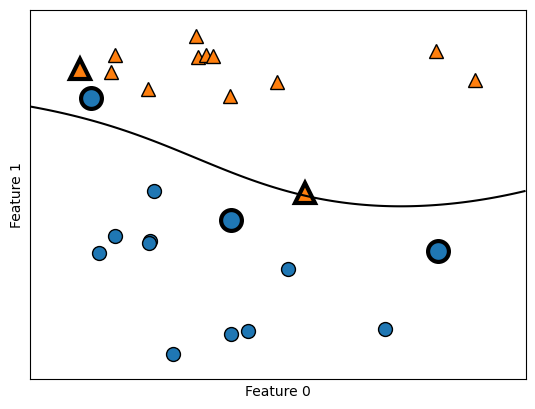

In [20]:
plot.plot_2d_separator(svm, X, eps=.5)
plot.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_

# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
plot.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.grid()
plt.show()

In [21]:
print("The support vector coordinates are:")
print(sv)

The support vector coordinates are:
[[ 8.1062269   4.28695977]
 [ 9.50169345  1.93824624]
 [11.563957    1.3389402 ]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]


## Tuning SVM parameters

**The $gamma$ parameter controls the width of the Gaussian Kernel**. It determines the scale of what it means for points to be close together. The $C$ parameter is a regularization parameter similar to the linear models. It controls the importance of each point (or more precisely, their `dual_coef_`).

**Let’s have a look at what happens when we vary these parameters**. 

We will use the function `plot_svm` below to help. **Once again don't worry about this code.**

In [22]:
def plot_svm(X, y, log_C, log_gamma, ax=None):
    C = 10. ** log_C
    gamma = 10. ** log_gamma
    svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(X, y)
    if ax is None:
        ax = plt.gca()
    plot.plot_2d_separator(svm, X, ax=ax, eps=.5)
    # plot data
    plot.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    # plot support vectors
    sv = svm.support_vectors_
    # class labels of support vectors are given by the sign of the dual coefficients
    sv_labels = svm.dual_coef_.ravel() > 0
    plot.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3, ax=ax)
    ax.set_title("C = %.1f gamma = %.1f" % (C, gamma))

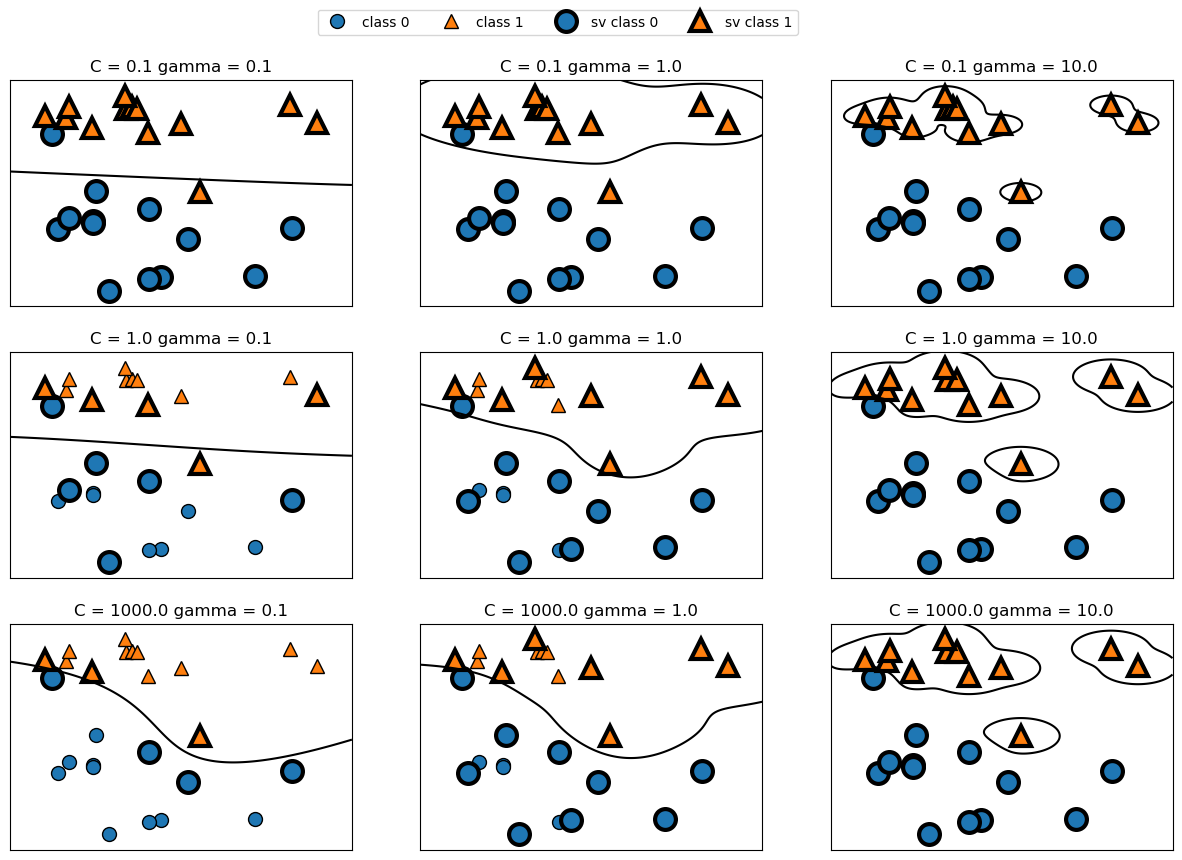

In [23]:
X, y = make_forge()

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        plot_svm(X, y, log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))
plt.show()

**Let’s apply the RBF kernel SVM to the breast cancer dataset**. By default, $C=1$ and `gamma=1/n_features`.

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, shuffle=True, random_state=0)

svc = SVC(gamma='auto').fit(X_train, y_train)


In [25]:
pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

print("F1 on training set:", f1_score(y_train, pred_train))
print("F1 on test set: ", f1_score(y_test, pred_test))

F1 on training set: 1.0
F1 on test set:  0.7403314917127072


As you can see, **the model overfits quite substantially**, with a perfect score on the training set and F1 of only 0.74 on the test set.

**While SVMs often perform quite well, they are very sensitive to the settings of parameters, and also to the scaling of data. In particular, they perform much better when all the features vary on a similar scale**. 

Let’s look at the minimum and maximum values for each feature, plotted in log-space:

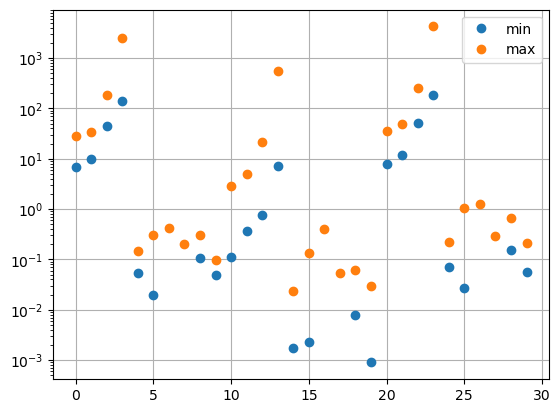

In [26]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.legend(loc="best")
plt.grid()
plt.yscale("log")

From this plot we can observe that **features** in the `Breast cancer dataset` **are of completely different orders of magnitude**. This can be somewhat of a problem for other models (like linear models), but it has **devastating effects for the kernel SVM**.

## Preprocessing Data for SVMs

One way to solve this problem is by rescaling each feature, so that they are approximately on the same scale. 

**A common rescaling method for kernel SVMs is to scale the data such that all features are between zero and one.**

Let’s scale the features in `Cancer dataset` such that all features are between zero and one using our familiar `MinMaxScaler`

In [39]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


With the scaler fitted we can transform the Testing set as well
(notice how the ranges deviate from the Training set)

In [40]:

X_test_scaled = scaler.transform(X_test)
print("Minimum for each feature\n{}".format(X_test_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_test_scaled.max(axis=0)))

Minimum for each feature
[ 0.03540158  0.04979253  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00257107  0.00041991
  0.00430665 -0.0007963   0.05148726  0.0112206   0.          0.
  0.04195752  0.01113138  0.03678406  0.0554371   0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
Maximum for each feature
 [0.72360263 1.22697095 0.7532997  0.57921527 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72639675
 0.48593507 0.31641282 1.36082713 0.68666446 0.36313131 0.77476795
 1.32643996 0.72672498 0.7282106  0.87553305 0.77887345 0.54040503
 0.78603975 0.81575807 0.93450479 1.0024113  0.76384782 0.57759412]


Let´s now train and evaluate the `SVM` on the scaled data.

In [41]:
svc_scaled = SVC(gamma='auto').fit(X_train_scaled, y_train)
pred_train=svc_scaled.predict(X_train_scaled)
pred_test=svc_scaled.predict(X_test_scaled)

print("F1 on training set:", f1_score(y_train, pred_train))
print("F1 on test set: ", f1_score(y_test, pred_test))

F1 on training set: 0.9601328903654486
F1 on test set:  0.9640287769784173


Scaling the data made a huge difference! Training and test set performance are quite similar. But can we do better?

We can try increasing either $C$ or $gamma$ to achieve a more complex and more accurate model.

In [42]:
svc_scaled = SVC(C=100,gamma='auto').fit(X_train_scaled, y_train)

pred_train=svc_scaled.predict(X_train_scaled)
pred_test=svc_scaled.predict(X_test_scaled)

print("F1 on training set:", f1_score(y_train, pred_train))
print("F1 on test set: ", f1_score(y_test, pred_test))

F1 on training set: 0.988034188034188
F1 on test set:  0.9701492537313433


In [43]:
svc_scaled = SVC(C=1000,gamma='auto').fit(X_train_scaled, y_train)

pred_train=svc_scaled.predict(X_train_scaled)
pred_test=svc_scaled.predict(X_test_scaled)

print("F1 on training set:", f1_score(y_train, pred_train))
print("F1 on test set: ", f1_score(y_test, pred_test))

svc_scaled = SVC(gamma='auto').fit(X_train_scaled, y_train)
pred_train=svc_scaled.predict(X_train_scaled)
pred_test=svc_scaled.predict(X_test_scaled)

print("F1 on training set:", f1_score(y_train, pred_train))
print("F1 on test set: ", f1_score(y_test, pred_test))

F1 on training set: 0.9897260273972602
F1 on test set:  0.9850746268656716
F1 on training set: 0.9601328903654486
F1 on test set:  0.9640287769784173


Increasing $C$ allowed us to improve the model significantly, resulting in 98.5% accuracy in the test set.

### Exercise 2
Go back and replace the MinMaxScaler with the StandardScaler. What happens to the results? What is the effect of increasing $C$ in this case?  

In [33]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))


X_test_scaled = scaler.transform(X_test)
print("Minimum for each feature\n{}".format(X_test_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_test_scaled.max(axis=0)))

svc_scaled = SVC(C=100,gamma='auto').fit(X_train_scaled, y_train)

pred_train=svc_scaled.predict(X_train_scaled)
pred_test=svc_scaled.predict(X_test_scaled)

print("F1 on training set:", f1_score(y_train, pred_train))
print("F1 on test set: ", f1_score(y_test, pred_test))

print("incresead C \n\n")
#incresing C 
svc_scaled = SVC(C=100,gamma='auto').fit(X_train_scaled, y_train)

pred_train=svc_scaled.predict(X_train_scaled)
pred_test=svc_scaled.predict(X_test_scaled)

print("F1 on training set:", f1_score(y_train, pred_train))
print("F1 on test set: ", f1_score(y_test, pred_test))
svc_scaled = SVC(C=1000,gamma='auto').fit(X_train_scaled, y_train)

pred_train=svc_scaled.predict(X_train_scaled)
pred_test=svc_scaled.predict(X_test_scaled)

print("F1 on training set:", f1_score(y_train, pred_train))
print("F1 on test set: ", f1_score(y_test, pred_test))

svc_scaled = SVC(gamma='auto').fit(X_train_scaled, y_train)
pred_train=svc_scaled.predict(X_train_scaled)
pred_test=svc_scaled.predict(X_test_scaled)

print("F1 on training set:", f1_score(y_train, pred_train))
print("F1 on test set: ", f1_score(y_test, pred_test))

#before incresing C results get worser on the test and when c is 100 the same but when c is 1000 its bette ron the test that with the other scaller

Minimum for each feature
[-2.01940374 -2.27298803 -1.97758927 -1.42637934 -3.17634419 -1.66431173
 -1.12569574 -1.26287094 -2.73822471 -1.86571828 -1.02452182 -1.56951437
 -1.0160812  -0.69335245 -1.86246228 -1.3042055  -1.0129125  -1.97706948
 -1.54421953 -1.08004989 -1.70435952 -2.21839784 -1.67360765 -1.18820113
 -2.71180676 -1.46835588 -1.34136004 -1.75401433 -2.12827758 -1.59890274]
Maximum for each feature
 [ 3.96362762  3.52810408  3.98091912  5.16300591  3.50304585  4.12577731
  4.36609705  3.95564407  4.49656115  5.10502068  8.69708777  6.78861237
  9.41028144 10.52718237  5.74771792  6.30837677 11.73185539  6.98449383
  4.99967235 10.02359555  4.04978287  3.93855484  4.26131521  5.75809625
  3.98837355  5.27090871  4.93690979  2.69509633  5.9340515   6.9689873 ]
Minimum for each feature
[-1.80759497 -1.98413697 -1.80506388 -1.32771325 -2.22380383 -1.37482711
 -1.12569574 -1.26287094 -2.21571239 -1.8246103  -0.99952692 -1.56600473
 -0.97117852 -0.7022874  -1.47063499 -1.218787

## Multiclass Classification using SVMs

As we saw above, in Scikit-learn `LinearSVC` implements “one-vs-rest” multiclass strategy, thus training `n_class models`. If there are only two classes, only one model is trained.

On the other hand **`SVC` implements the “one-against-one” approach** (Knerr et al., 1990) for multiclass classification. If `n_class` is the number of classes, the `n_class * (n_class - 1) / 2` classifiers are constructed and each one trains data from two classes. 

**Multiclass classification with SVMs in Scikit-learn (http://scikit-learn.org/stable/modules/svm.html#multi-class-classification).**

# SVM Regression

First let's create a simple dataset with 1 independent variable

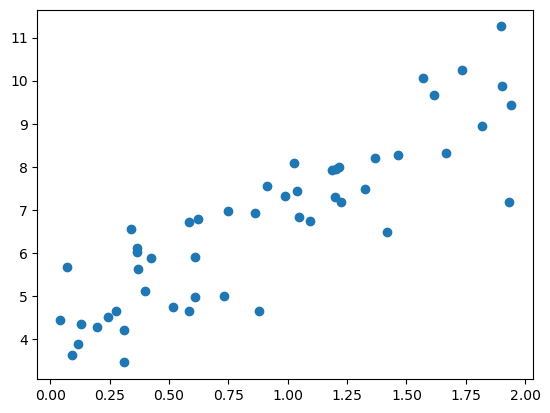

In [44]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
plt.scatter(X,y)
plt.show()

Now, for display purposes let's fit two Linear SVRs one with a $\epsilon=1.5$, the other, a narrower hypertube with $\epsilon = 0.5$

In [45]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, dual='auto', random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, dual='auto', random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Now let's plot both

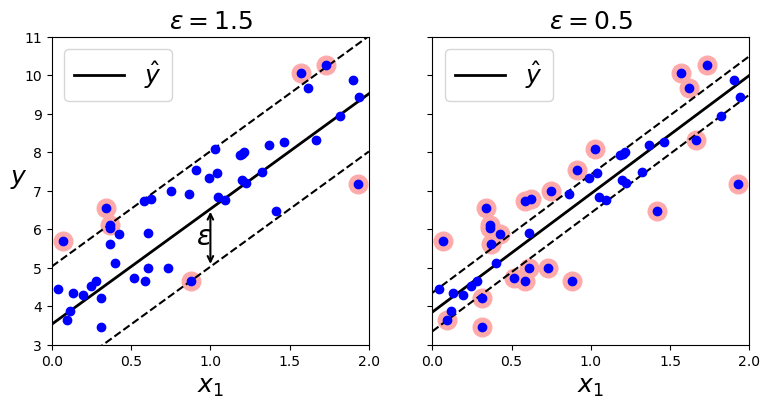

In [46]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

## Non-linear curve fitting with polynomial kernels in Regression

Let's create a parabolic dataset with one independent variable

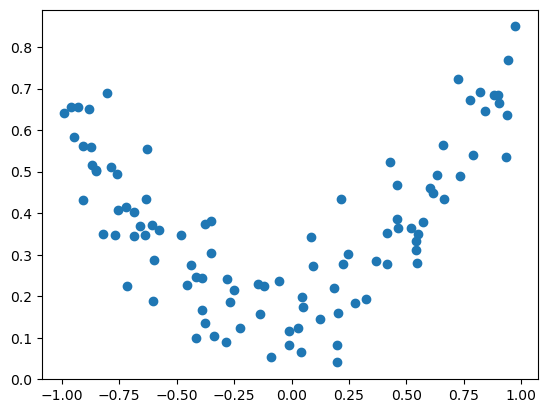

In [47]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()
plt.scatter(X,y)
plt.show()

Now let's check how two different Epsilons behave and their impacts graphically

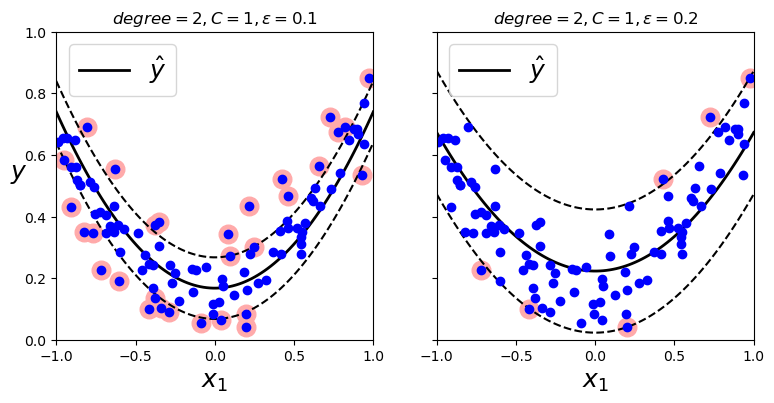

In [48]:
from sklearn.svm import SVR

#first fit model
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=1, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=1, epsilon=0.2, gamma="scale")
svm_poly_reg1 = svm_poly_reg1.fit(X, y)
svm_poly_reg2 = svm_poly_reg2.fit(X, y)

#now plot stuff
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon))
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon))
plt.show()

### Exercise 3
3.1 Check the quality of both models above with simple cross validation

3.2 What is the best Epsilon for that data partition? Show a plot that supports your choice.


In [51]:
X_train, X_test, y_train, y_test = train_test_split( X,y, random_state=0, test_size=0.2)


from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr

def present_reg_statistics(y_test, preds):
    corr=r2_score(y_test, preds)
    print("The R2 is: %6.2f"%corr)
    print("The rmse is: ", mean_squared_error(y_test, preds, squared=True))
    

In [55]:
#Start here for exercise 3.1
# Example usage with svm_poly_reg1
preds_reg1 = svm_poly_reg1.predict(X_test)
present_reg_statistics(y_test, preds_reg1)

# Example usage with svm_poly_reg2
preds_reg2 = svm_poly_reg2.predict(X_test)
present_reg_statistics(y_test, preds_reg2)

from sklearn.model_selection import cross_val_score

# Perform cross-validation for svm_poly_reg1
scores_reg1 = cross_val_score(svm_poly_reg1, X, y, cv=5, scoring='r2')
print("Cross-validation scores for svm_poly_reg1:", scores_reg1)
print("Mean R2 score for svm_poly_reg1:", np.mean(scores_reg1))

# Perform cross-validation for svm_poly_reg2
scores_reg2 = cross_val_score(svm_poly_reg2, X, y, cv=5, scoring='r2')
print("\nCross-validation scores for svm_poly_reg2:", scores_reg2)
print("Mean R2 score for svm_poly_reg2:", np.mean(scores_reg2))

The R2 is:   0.74
The rmse is:  0.008514577584166991
The R2 is:   0.68
The rmse is:  0.010211985069108642
Cross-validation scores for svm_poly_reg1: [0.87079535 0.73039459 0.69107791 0.58578781 0.63463964]
Mean R2 score for svm_poly_reg1: 0.7025390594680101

Cross-validation scores for svm_poly_reg2: [0.75312337 0.73773718 0.69107184 0.56508309 0.64164707]
Mean R2 score for svm_poly_reg2: 0.6777325086520308


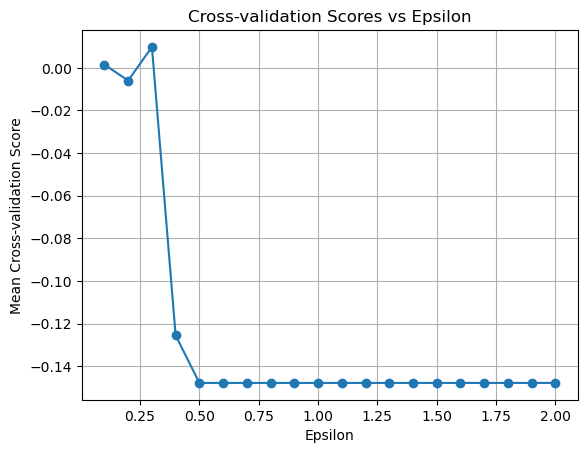

Best Epsilon: 0.3


In [53]:
#Exercise 3.2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Define a range of epsilon values
epsilons = np.linspace(0.1, 2, 20)

# Initialize an empty list to store mean cross-validation scores
mean_scores = []

# Perform cross-validation for each epsilon value
for epsilon in epsilons:
    # Initialize SVR model with current epsilon value
    svm_reg = SVR(kernel="linear", C=1, epsilon=epsilon)
    
    # Perform cross-validation and compute mean score
    scores = cross_val_score(svm_reg, X, y, cv=5)
    mean_scores.append(np.mean(scores))

# Plot the results
plt.plot(epsilons, mean_scores, marker='o')
plt.xlabel("Epsilon")
plt.ylabel("Mean Cross-validation Score")
plt.title("Cross-validation Scores vs Epsilon")
plt.grid(True)
plt.show()

# Choose the best epsilon value
best_epsilon = epsilons[np.argmax(mean_scores)]
print("Best Epsilon:", best_epsilon)

### Exercise 4

You are going to train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What F1 can you reach? (use the 'macro' F1 for multiclass classification)

First, let's load the dataset and split it into a training set and a test set.

We could use `train_test_split()` but people usually just take the first 60,000 instances for the training set, and the last 10,000 instances for the test set (this makes it possible to compare your model's performance with others). But that takes a long time, so we leave it as an extra exercise to do at home.

Here and now, use the first 6000 instances for training and the last 2000 for testing, according to the code below: 

In [56]:
from sklearn.datasets import fetch_openml
#The line below with the "parser" option may be important for some versions of sklearn

#X, y = fetch_openml('mnist_784', version=1, cache=True, return_X_y=True, parser='liac-arff')
X, y = fetch_openml('mnist_784', version=1, cache=True, return_X_y=True, parser='auto')
X=X.values
y=y.values
X_train = X[:6000]
y_train = y[:6000]
X_test = X[68000:]
y_test = y[68000:]

Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All (also called One-vs-Rest, OvR) strategy, so there's nothing special we need to do. Easy!

**Warning**: When you use 60,000 instances for training, this may take a few minutes depending on your hardware.

In [57]:
from time import time
lin_clf = LinearSVC(max_iter=1000, dual='auto', random_state=42)

t1=time()
lin_clf.fit(X_train, y_train)
print ("It took %7.4f seconds" % (time()-t1))

It took 16.1608 seconds


C:\Users\panke\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Let's make predictions on the training and test sets, and measure the F1 score:

In [58]:
y_pred_train = lin_clf.predict(X_train)
y_pred_test = lin_clf.predict(X_test)

print("F1 on training data:", f1_score(y_train, y_pred_train,average='macro'))
print("F1 on test data:", f1_score(y_test, y_pred_test,average='macro'))


F1 on training data: 0.9983074263265574
F1 on test data: 0.8717969185381278


Okay, the result produced for this classical dataset is not that good, as regular models get almost perfect classifiers.

#### Improve these scores!



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1000, 2000, 3000]
}

# Initialize the linear SVM classifier
lin_clf = LinearSVC(dual=False, random_state=42)

# Perform grid search
grid_search = GridSearchCV(lin_clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the F1 scores
f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
print("F1 on training data after tuning:", f1_train)
print("F1 on test data after tuning:", f1_test)


### Exercise 5

5.1. Train and tune an SVM to the diabetes dataset. Check Kernels, C, Epsilon and Gamma. Also check if the data is scaled; if not, it may need to be scaled
    
5.2. **Extra**, not for evaluation: Train an SVM regressor on the California housing dataset and test the default parameters for all kernels


In [ ]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y =True)

X_train, X_test, y_train, y_test = train_test_split( X,y, random_state=0, test_size=0.2)

#continue here:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.3],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM classifier
svm = SVC()

# Perform grid search cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the classifier
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


For Exercise 5.2 we will load the dataset using Scikit-Learn's `fetch_california_housing()` function:

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [ ]:
# Continue here